In [1]:
import pandas as pd
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon
from copy import deepcopy
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

C:\Users\joell\AppData\Local\Temp\ipykernel_1992\2628748377.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city_filtered['date'] = pd.to_datetime(df_city_filtered['date'])
C:\Users\joell\AppData\Local\Temp\ipykernel_1992\2628748377.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city_filtered['fully_vaccinated_rate'] = (df_city_filtered['fully_vaccinated'] / df_city_filtered['population']) * 100


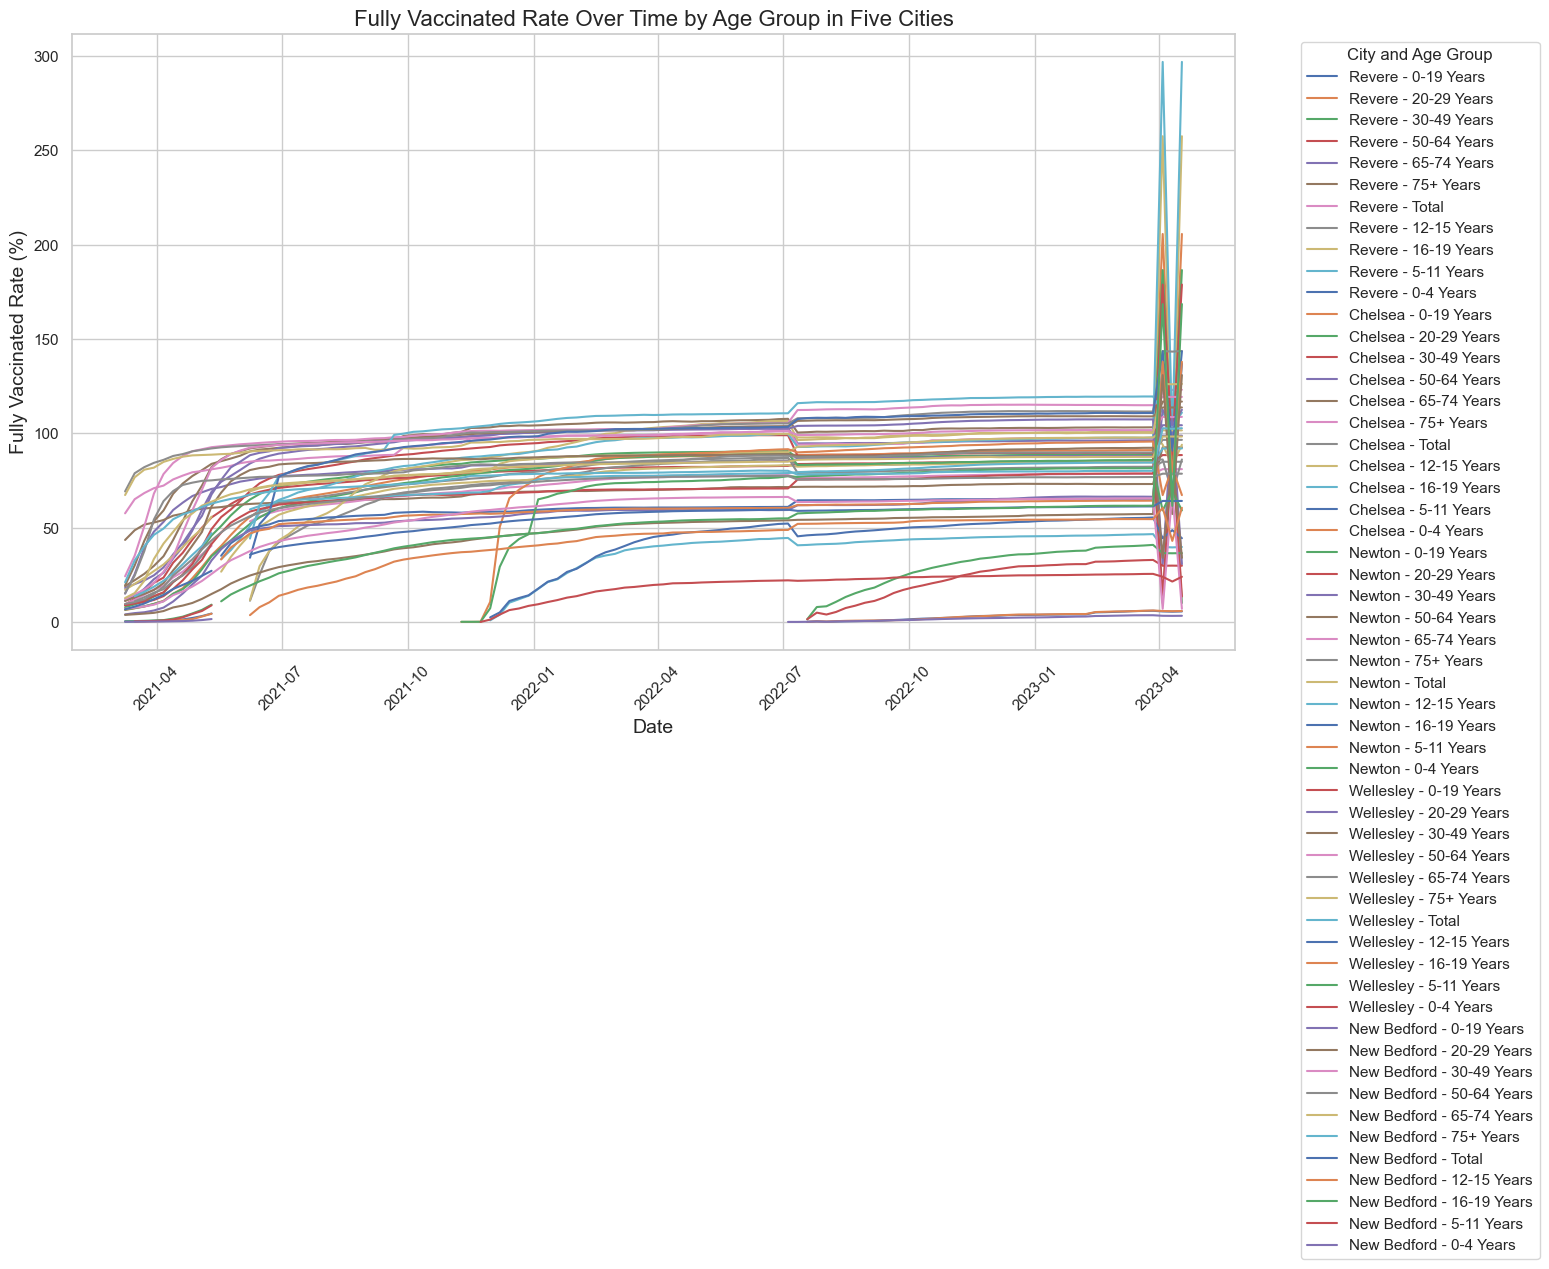

In [2]:
df_city_age = pd.read_csv('/BU_grad/DS701_Tools/COVID-data_Massachusetts-vaccines - vaccine_city_age.csv')
# Filtering the City-Age Dataset for the specified cities
cities_of_interest = ['Revere', 'Chelsea', 'Newton', 'Wellesley', 'New Bedford']
df_city_filtered = df_city_age[df_city_age['city'].isin(cities_of_interest)]

# Parsing dates
df_city_filtered['date'] = pd.to_datetime(df_city_filtered['date'])

# Calculating the fully vaccinated rate
df_city_filtered['fully_vaccinated_rate'] = (df_city_filtered['fully_vaccinated'] / df_city_filtered['population']) * 100

# Selecting relevant columns for the line chart
columns_for_chart = ['date', 'city', 'age_group', 'fully_vaccinated_rate']

df_city_for_chart = df_city_filtered[columns_for_chart]

# Checking the processed data for the chart
df_city_for_chart.head()

# Setting the plot style
sns.set(style="whitegrid")

# Creating a line chart
plt.figure(figsize=(15, 8))

# Plotting the fully vaccinated rate over time for each age group in each city
for city in cities_of_interest:
    city_data = df_city_for_chart[df_city_for_chart['city'] == city]
    for age_group in city_data['age_group'].unique():
        age_group_data = city_data[city_data['age_group'] == age_group]
        plt.plot(age_group_data['date'], age_group_data['fully_vaccinated_rate'], label=f'{city} - {age_group}')


# Adding plot title and labels
plt.title('Fully Vaccinated Rate Over Time by Age Group in Five Cities', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Fully Vaccinated Rate (%)', fontsize=14)
plt.legend(title='City and Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)

# Showing the plot
plt.show()


C:\Users\joell\AppData\Local\Temp\ipykernel_1992\528781165.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city_for_chart_filtered_no_0_19['fully_vaccinated_rate'] = df_city_for_chart_filtered_no_0_19['fully_vaccinated_rate'].clip(upper=100)


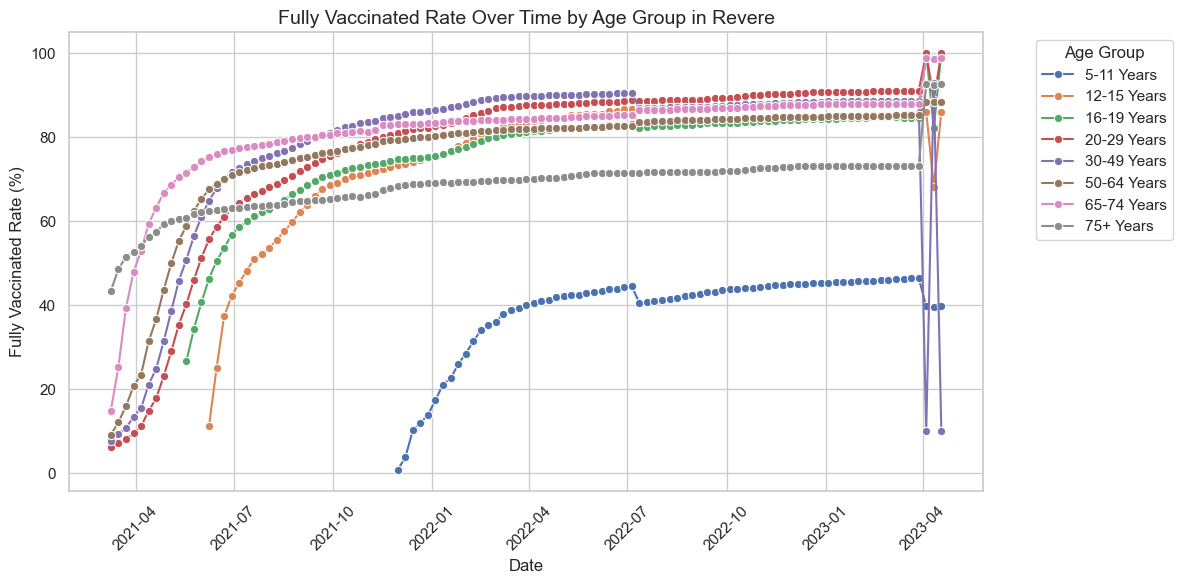

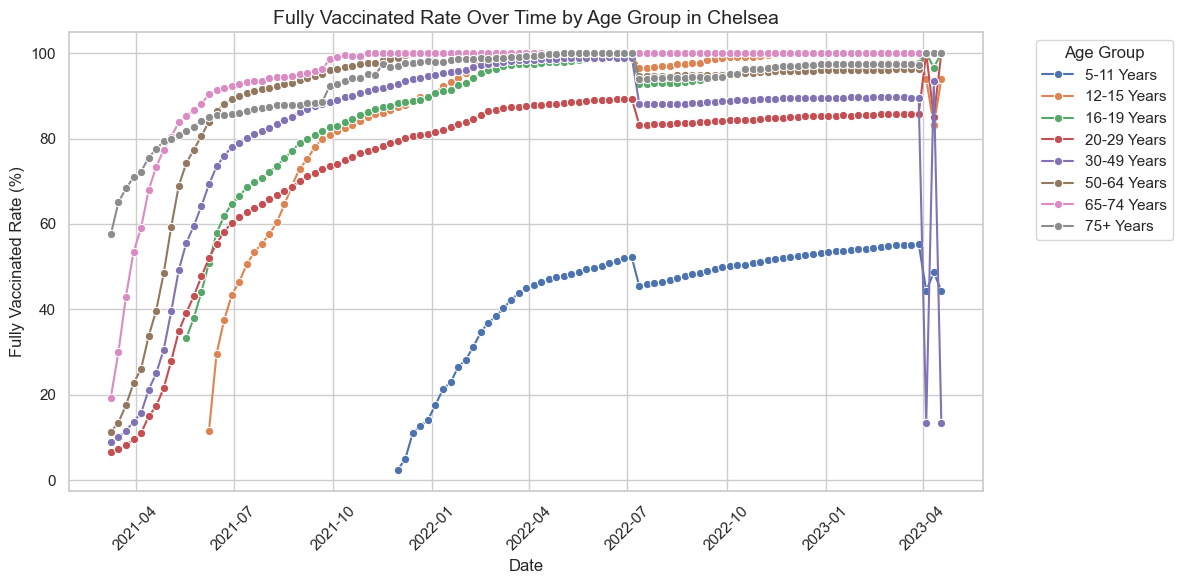

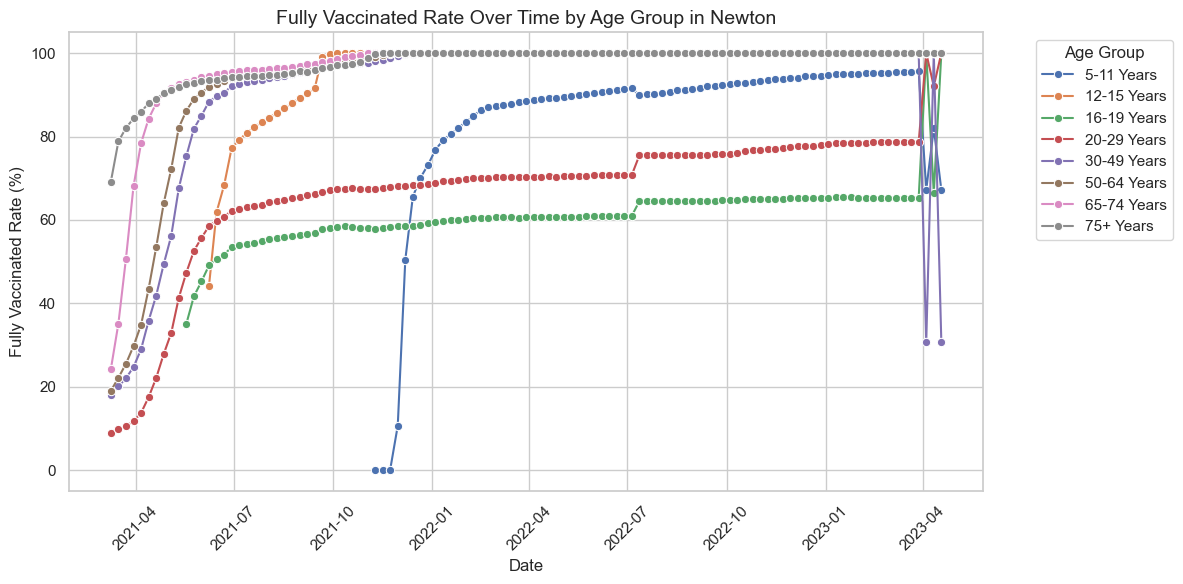

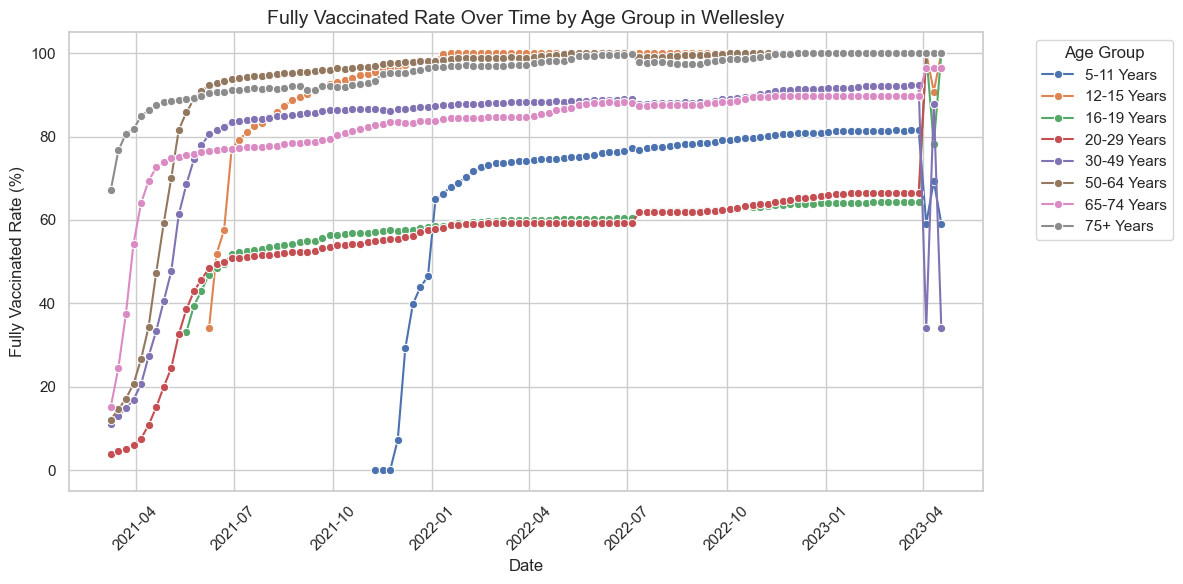

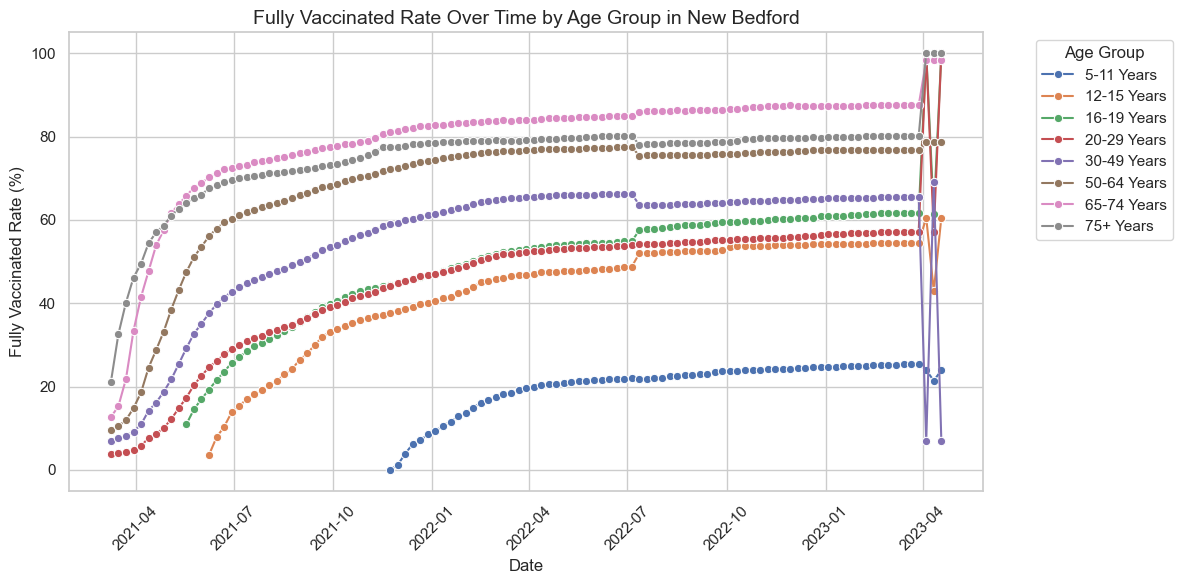

In [6]:
# Excluding the '0-19 Years' age group from the filtered dataset
age_groups_to_exclude_extended = ['Total', '0-19 Years']
df_city_for_chart_filtered_no_0_19 = df_city_for_chart[~df_city_for_chart['age_group'].isin(age_groups_to_exclude_extended)]
df_city_for_chart_filtered_no_0_19['fully_vaccinated_rate'] = df_city_for_chart_filtered_no_0_19['fully_vaccinated_rate'].clip(upper=100)

# Creating individual plots for each city using seaborn for better aesthetics
for city in cities_of_interest:
    plt.figure(figsize=(12, 6))
    city_data = df_city_for_chart_filtered_no_0_19[df_city_for_chart_filtered_no_0_19['city'] == city]

    sns.lineplot(data=city_data, x='date', y='fully_vaccinated_rate', hue='age_group', marker='o', hue_order=hue_order)

    # Adding plot title and labels
    plt.title(f'Fully Vaccinated Rate Over Time by Age Group in {city}', fontsize=14)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Fully Vaccinated Rate (%)', fontsize=12)
    plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [7]:
from scipy.stats import pearsonr

# Assigning a representative numerical value to each age group
age_group_mapping = {
    '0-4 Years': 2,    # Midpoint of 0-4
    '5-11 Years': 8,   # Midpoint of 5-11
    '12-15 Years': 13, # Midpoint of 12-15
    '16-19 Years': 17, # Midpoint of 16-19
    '20-29 Years': 25, # Midpoint of 20-29
    '30-49 Years': 40, # Midpoint of 30-49
    '50-64 Years': 57, # Midpoint of 50-64
    '65-74 Years': 70, # Midpoint of 65-74
    '75+ Years': 80    # Representative value for 75+
}


In [8]:
df = pd.read_csv('/BU_grad/DS701_Tools/COVID-data_Massachusetts-vaccines - vaccine_city_age.csv')
# Filtering the dataset for a different specific date: November 2, 2021
df_nov_2021 = df[df['date'] == '2021-11-02']

# Mapping age groups to numerical values for the November 2021 data
df_nov_2021['age_numeric'] = df_nov_2021['age_group'].map(age_group_mapping)

# Calculating the fully vaccinated rate for November 2021
df_nov_2021['fully_vaccinated_rate'] = (df_nov_2021['fully_vaccinated'] / df_nov_2021['population']) * 100

# Generate 1000 random samples and calculate averages
sample_averages = []
for _ in range(10):
    sample = df_nov_2021.sample(n=10)
    sample_avg = sample['fully_vaccinated_rate'].mean()
    sample_averages.append(sample_avg)

# Convert to DataFrame for analysis
sample_averages_df = pd.DataFrame(sample_averages, columns=['Average_Fully_Vaccinated_Rate'])

sample_averages_df

C:\Users\joell\AppData\Local\Temp\ipykernel_1992\945590478.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nov_2021['age_numeric'] = df_nov_2021['age_group'].map(age_group_mapping)
C:\Users\joell\AppData\Local\Temp\ipykernel_1992\945590478.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nov_2021['fully_vaccinated_rate'] = (df_nov_2021['fully_vaccinated'] / df_nov_2021['population']) * 100


,Average_Fully_Vaccinated_Rate
0,74.880334
1,79.494272
2,71.734498
3,82.673426
4,78.200516
5,77.866571
6,71.790351
7,75.042750
8,78.509897
9,69.937500


In [9]:
df = pd.read_csv('/BU_grad/DS701_Tools/COVID-data_Massachusetts-vaccines - vaccine_city_age.csv')
# Filtering the dataset for a different specific date: November 2, 2021
df_nov_2021 = df[df['date'] == '2021-11-02']

# Mapping age groups to numerical values for the November 2021 data
df_nov_2021['age_numeric'] = df_nov_2021['age_group'].map(age_group_mapping)

# Calculating the fully vaccinated rate for November 2021
df_nov_2021['fully_vaccinated_rate'] = (df_nov_2021['fully_vaccinated'] / df_nov_2021['population']) * 100


# Grouping by age group and calculating the mean vaccination rate for November 2021
grouped_data_nov_2021 = df_nov_2021.groupby('age_group')['fully_vaccinated_rate'].mean().reset_index()
grouped_data_nov_2021['age_numeric'] = grouped_data_nov_2021['age_group'].map(age_group_mapping)

# Checking the availability and completeness of data for November 2021
grouped_data_nov_2021


C:\Users\joell\AppData\Local\Temp\ipykernel_1992\45109859.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nov_2021['age_numeric'] = df_nov_2021['age_group'].map(age_group_mapping)
C:\Users\joell\AppData\Local\Temp\ipykernel_1992\45109859.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nov_2021['fully_vaccinated_rate'] = (df_nov_2021['fully_vaccinated'] / df_nov_2021['population']) * 100


,age_group,fully_vaccinated_rate,age_numeric
0,12-15 Years,66.678846,13.0
1,16-19 Years,75.040658,17.0
2,20-29 Years,67.215325,25.0
3,30-49 Years,74.576553,40.0
4,50-64 Years,81.056944,57.0
5,65-74 Years,89.421886,70.0
6,75+ Years,88.290665,80.0
7,Total,69.741769,NaN


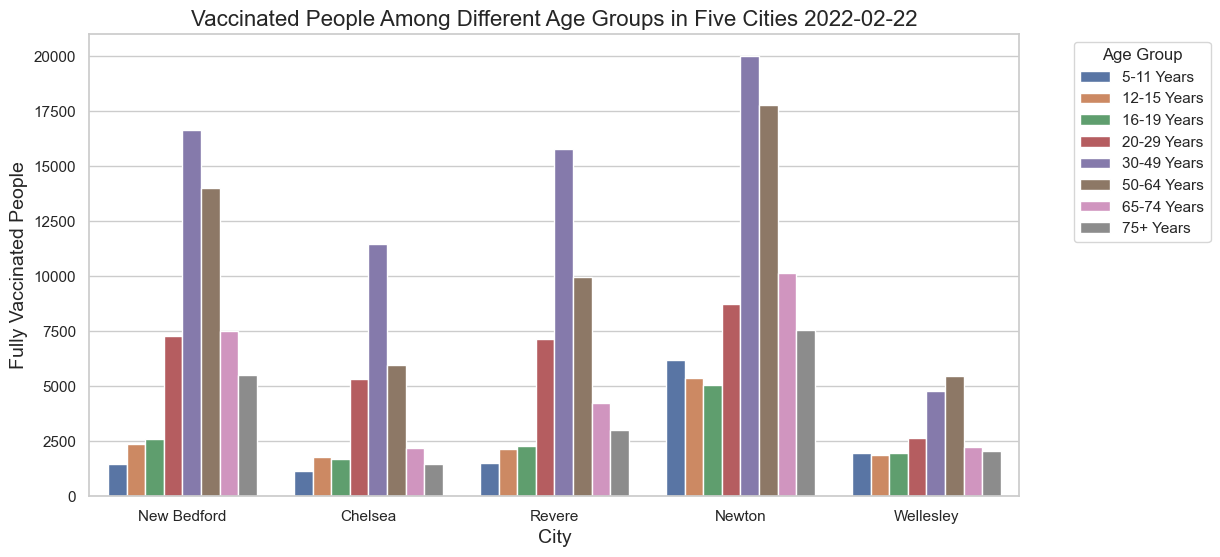

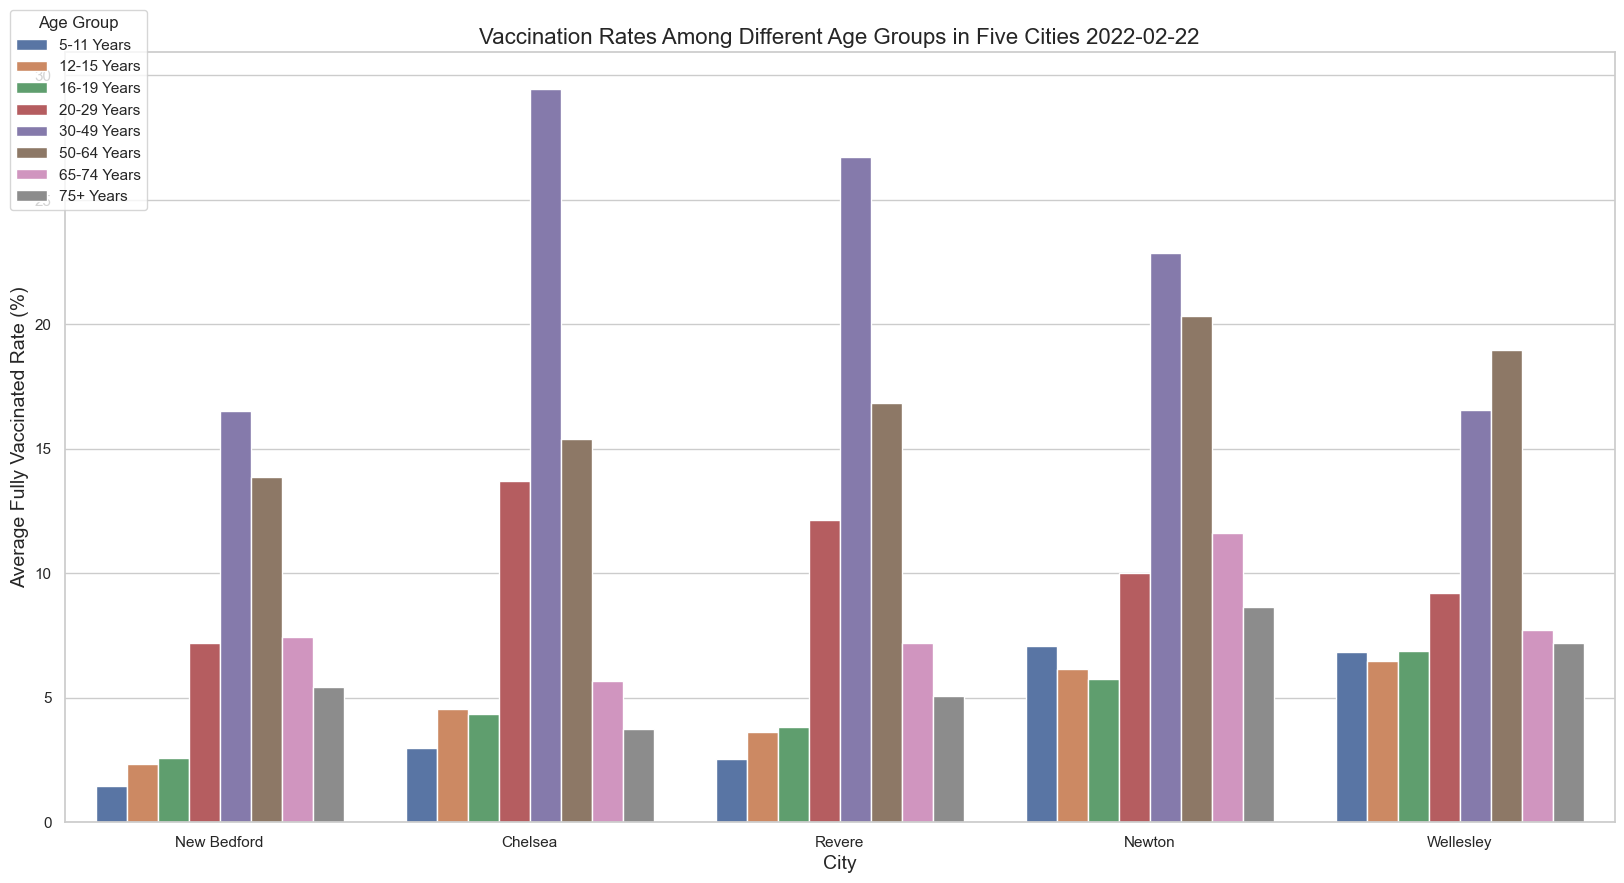

In [39]:
df = pd.read_csv('/BU_grad/DS701_Tools/COVID-data_Massachusetts-vaccines - vaccine_city_age.csv')

# Population updates
population_updates = {
    'Revere': 59075,
    'Chelsea': 38889,
    'Newton': 87453,
    'Wellesley': 28747,
    'New Bedford': 100941
}

for city, new_population in population_updates.items():
    df.loc[df['city'] == city, 'population'] = new_population


# Filter the dataset for the specified cities
cities_of_interest = ['Revere', 'Chelsea', 'Newton', 'Wellesley', 'New Bedford']
filtered_data = df[df['city'].isin(cities_of_interest)]

# Dropping the 'county', 'boosted_after_2022-09-01', 'boosted', 'boosted_second', 'partially_vaccinated'
columns_to_drop = ['county', 'boosted_after_2022-09-01', 'boosted', 'boosted_second', 'partially_vaccinated']
filtered_data_cleaned = filtered_data.drop(columns=columns_to_drop)

filtered_data_cleaned = filtered_data_cleaned[filtered_data_cleaned['date'] == '2022-02-22']

filtered_data_cleaned

plt.figure(figsize=(12, 6))
order = ['New Bedford','Chelsea','Revere','Newton', 'Wellesley']
hue_order = ['5-11 Years','12-15 Years', '16-19 Years', '20-29 Years', '30-49 Years', '50-64 Years', '65-74 Years','75+ Years']
sns.barplot(data=filtered_data_cleaned, x='city', y='fully_vaccinated', hue='age_group', hue_order=hue_order, order = order)

# Improving plot aesthetics
plt.xlabel('City', fontsize=14)
plt.ylabel('Fully Vaccinated People', fontsize=14)
plt.title('Vaccinated People Among Different Age Groups in Five Cities 2022-02-22', fontsize=16)
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
sns.set_style("whitegrid")

# Show the plot
plt.show()


filtered_data_cleaned['fully_vaccinated_rate'] = (filtered_data_cleaned['fully_vaccinated'] / filtered_data_cleaned['population']) * 100
plt.figure(figsize=(20, 10))
sns.barplot(data=filtered_data_cleaned, x='city', y='fully_vaccinated_rate', hue='age_group',hue_order= hue_order, order = order)


# Improving plot aesthetics
plt.xlabel('City', fontsize=14)
plt.ylabel('Average Fully Vaccinated Rate (%)', fontsize=14)
plt.title('Vaccination Rates Among Different Age Groups in Five Cities 2022-02-22', fontsize=16)
plt.legend(title='Age Group', loc='upper right', bbox_to_anchor=(0.17, 0.93), bbox_transform=plt.gcf().transFigure)
sns.set_style("whitegrid")

# Show the plot
plt.show()

C:\Users\joell\AppData\Local\Temp\ipykernel_1992\2229159304.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city_filtered['date'] = pd.to_datetime(df_city_filtered['date'])
C:\Users\joell\AppData\Local\Temp\ipykernel_1992\2229159304.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city_for_chart_filtered_no_0_19['fully_vaccinated_rate'] = df_city_for_chart_filtered_no_0_19['fully_vaccinated_rate'].clip(upper=100)


<Figure size 1500x800 with 0 Axes>

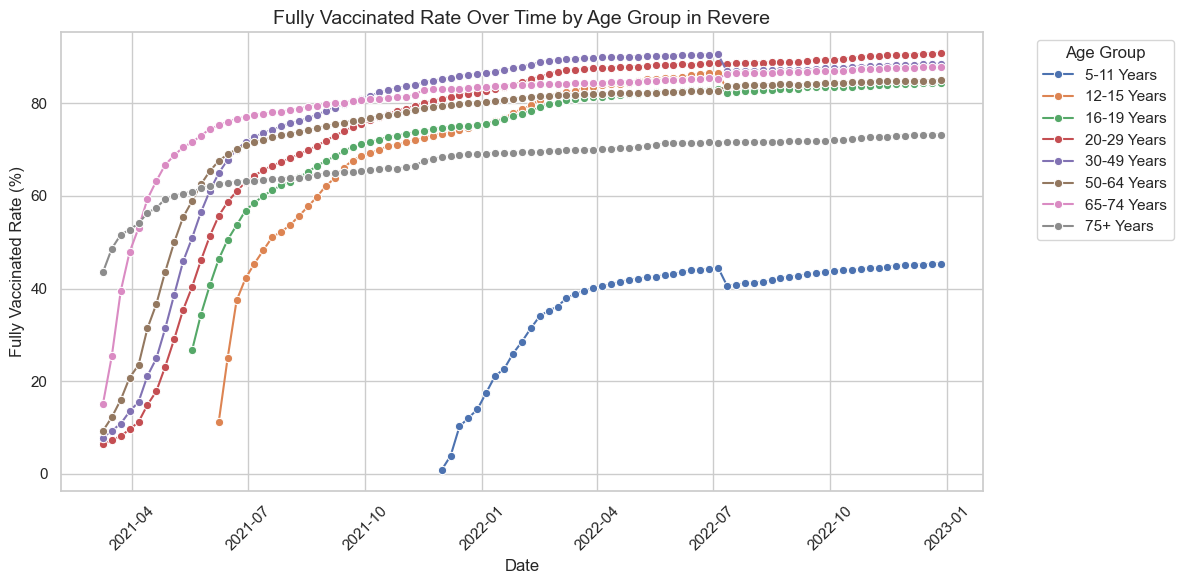

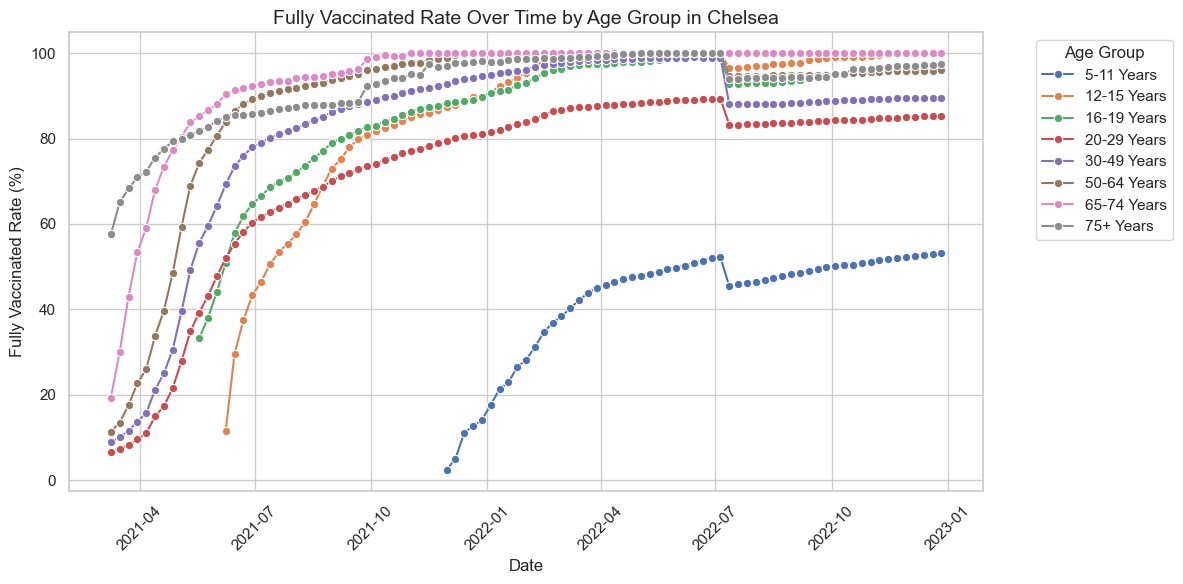

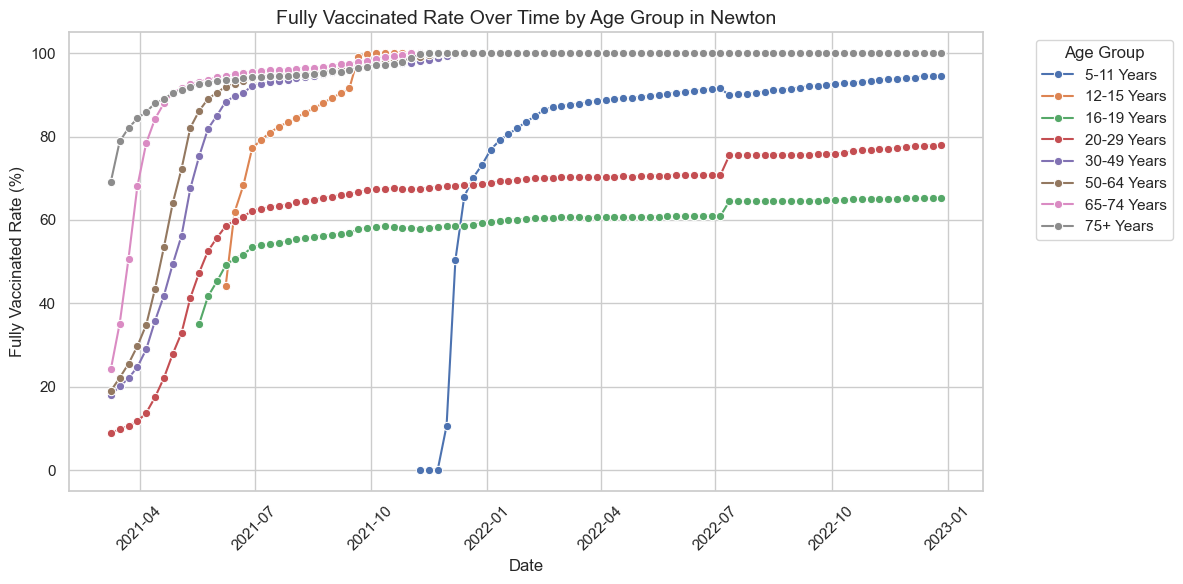

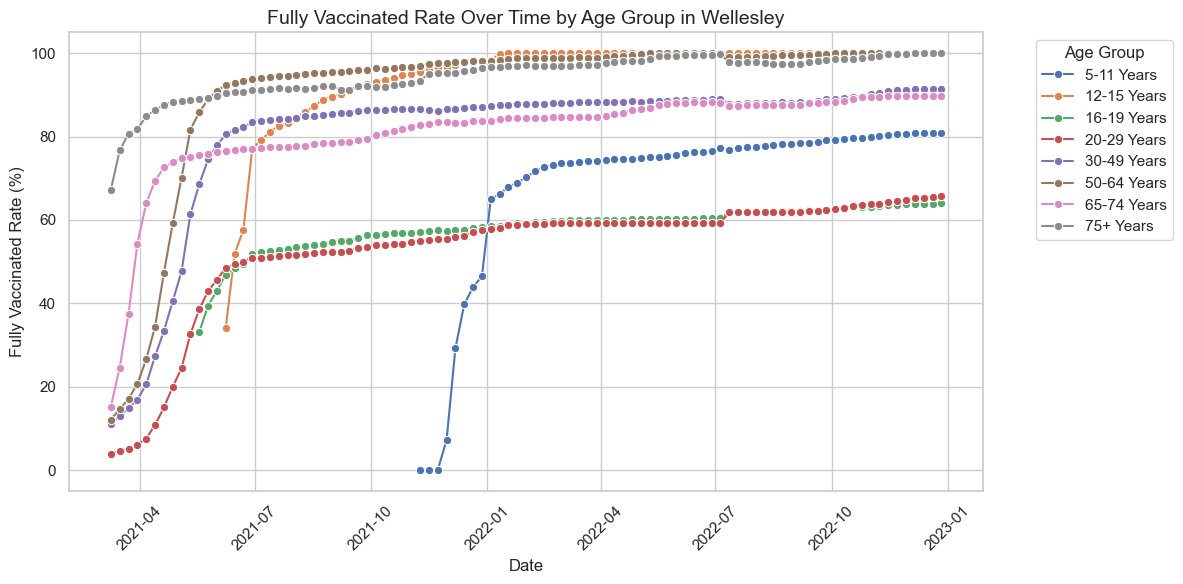

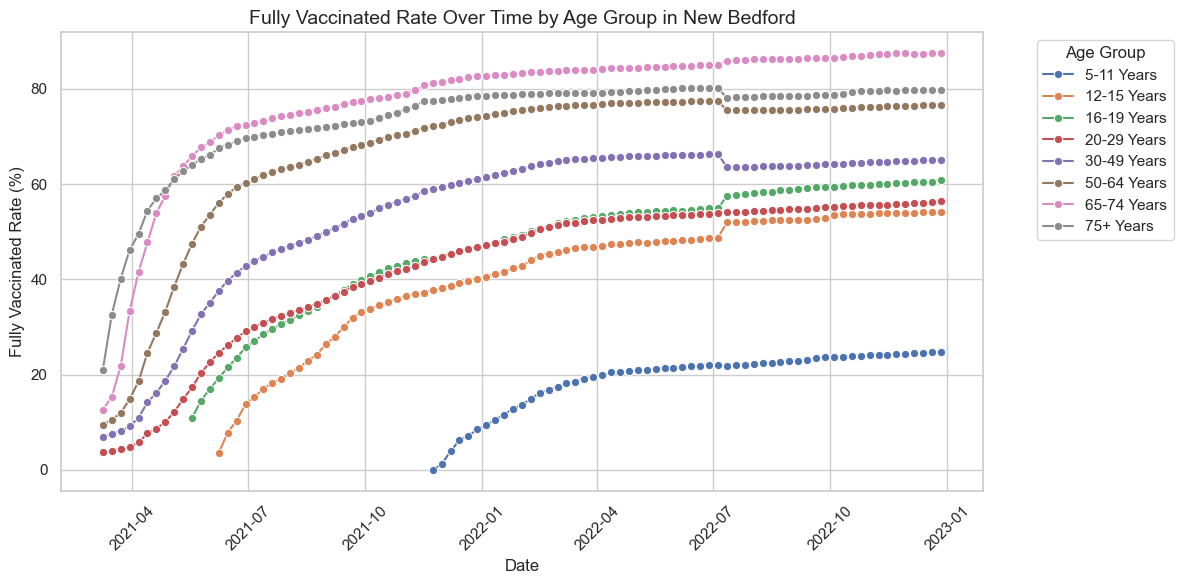

C:\Users\joell\AppData\Local\Temp\ipykernel_1992\2229159304.py:49: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_city_for_chart_filtered_no_0_19, x='date', y='fully_vaccinated_rate', hue='age_group', hue_order=hue_order, ci = None)


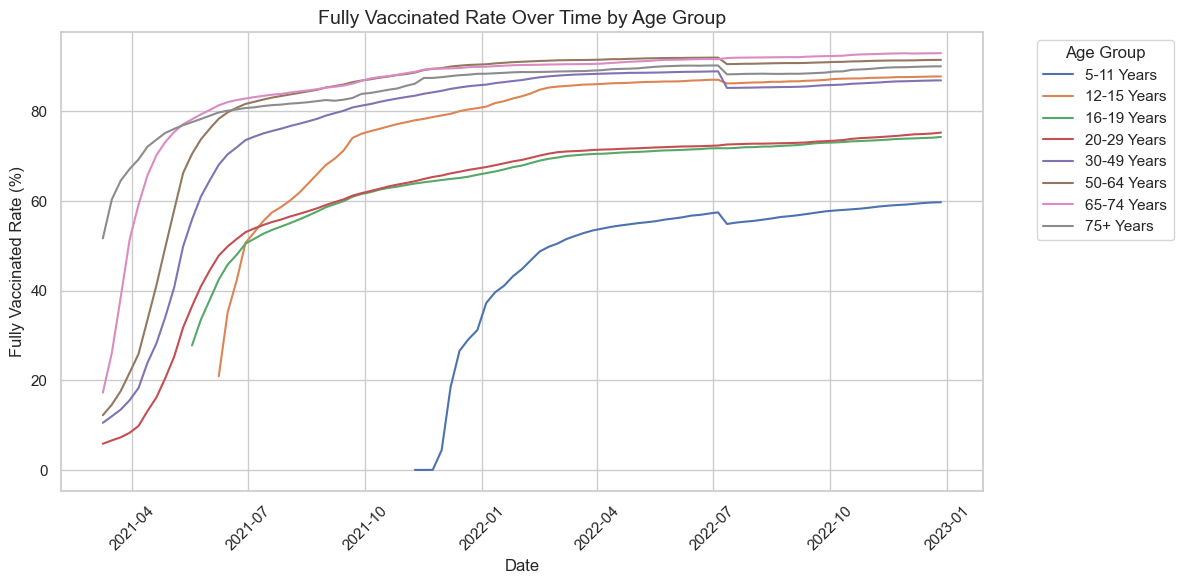

In [11]:
df_city_age = pd.read_csv('/BU_grad/DS701_Tools/COVID-data_Massachusetts-vaccines - vaccine_city_age.csv')
# Filtering the City-Age Dataset for the specified cities
cities_of_interest = ['Revere', 'Chelsea', 'Newton', 'Wellesley', 'New Bedford']
df_city_filtered = df_city_age[df_city_age['city'].isin(cities_of_interest)]

# Parsing dates
df_city_filtered['date'] = pd.to_datetime(df_city_filtered['date'])

df_city_filtered = df_city_filtered[df_city_filtered['date'] < pd.to_datetime('2023-01-01')]
# Calculating the fully vaccinated rate
df_city_filtered['fully_vaccinated_rate'] = (df_city_filtered['fully_vaccinated'] / df_city_filtered['population']) * 100

# Selecting relevant columns for the line chart
columns_for_chart = ['date', 'city', 'age_group', 'fully_vaccinated_rate']

df_city_for_chart = df_city_filtered[columns_for_chart]

# Checking the processed data for the chart
df_city_for_chart.head()

# Setting the plot style
sns.set(style="whitegrid")

# Creating a line chart
plt.figure(figsize=(15, 8))

# Excluding the '0-19 Years' age group from the filtered dataset
age_groups_to_exclude_extended = ['Total', '0-19 Years']
df_city_for_chart_filtered_no_0_19 = df_city_for_chart[~df_city_for_chart['age_group'].isin(age_groups_to_exclude_extended)]
df_city_for_chart_filtered_no_0_19['fully_vaccinated_rate'] = df_city_for_chart_filtered_no_0_19['fully_vaccinated_rate'].clip(upper=100)

# Creating individual plots for each city using seaborn for better aesthetics
for city in cities_of_interest:
    plt.figure(figsize=(12, 6))
    city_data = df_city_for_chart_filtered_no_0_19[df_city_for_chart_filtered_no_0_19['city'] == city]

    sns.lineplot(data=city_data, x='date', y='fully_vaccinated_rate', hue='age_group', marker='o', hue_order=hue_order)

    # Adding plot title and labels
    plt.title(f'Fully Vaccinated Rate Over Time by Age Group in {city}', fontsize=14)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Fully Vaccinated Rate (%)', fontsize=12)
    plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_city_for_chart_filtered_no_0_19, x='date', y='fully_vaccinated_rate', hue='age_group', hue_order=hue_order, ci = None)
# Adding plot title and labels
plt.title(f'Fully Vaccinated Rate Over Time by Age Group', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Fully Vaccinated Rate (%)', fontsize=12)
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\joell\AppData\Local\Temp\ipykernel_1992\3857779888.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_city_for_chart_filtered_no_0_19, x='date', y='fully_vaccinated_rate', hue='age_group', hue_order = hue_order, ci=None, marker='o', linewidth=1.5)


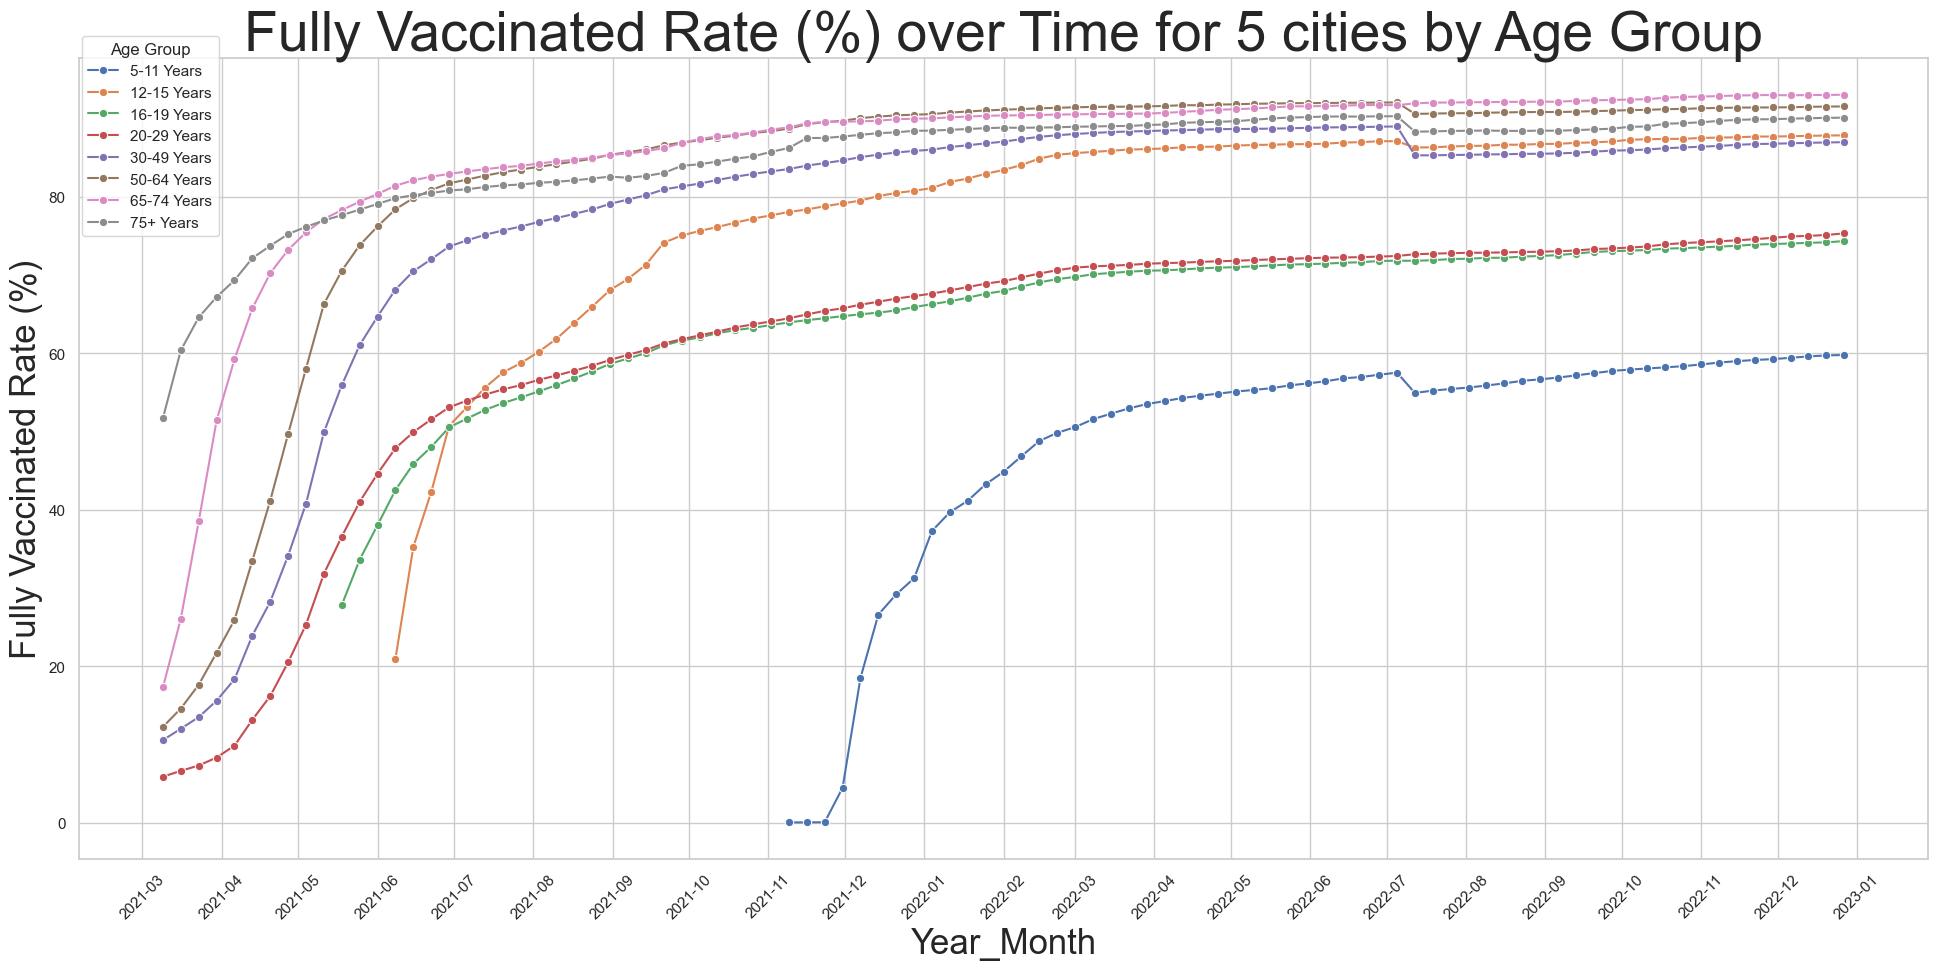

In [41]:
import matplotlib.dates as mdates
plt.figure(figsize=(20, 10))
# Adding markers with 'o' and reducing line width for better visibility
sns.lineplot(data=df_city_for_chart_filtered_no_0_19, x='date', y='fully_vaccinated_rate', hue='age_group', hue_order = hue_order, ci=None, marker='o', linewidth=1.5)

# Adding plot title and labels
plt.title('Fully Vaccinated Rate (%) over Time for 5 cities by Age Group', fontsize=40)
plt.xlabel('Year_Month', fontsize=25)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.ylabel('Fully Vaccinated Rate (%)', fontsize=25)

# Moving the legend inside the plot. Adjust these parameters as needed for your layout
plt.legend(title='Age Group', loc='upper right', bbox_to_anchor=(0.14, 0.95), bbox_transform=plt.gcf().transFigure)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

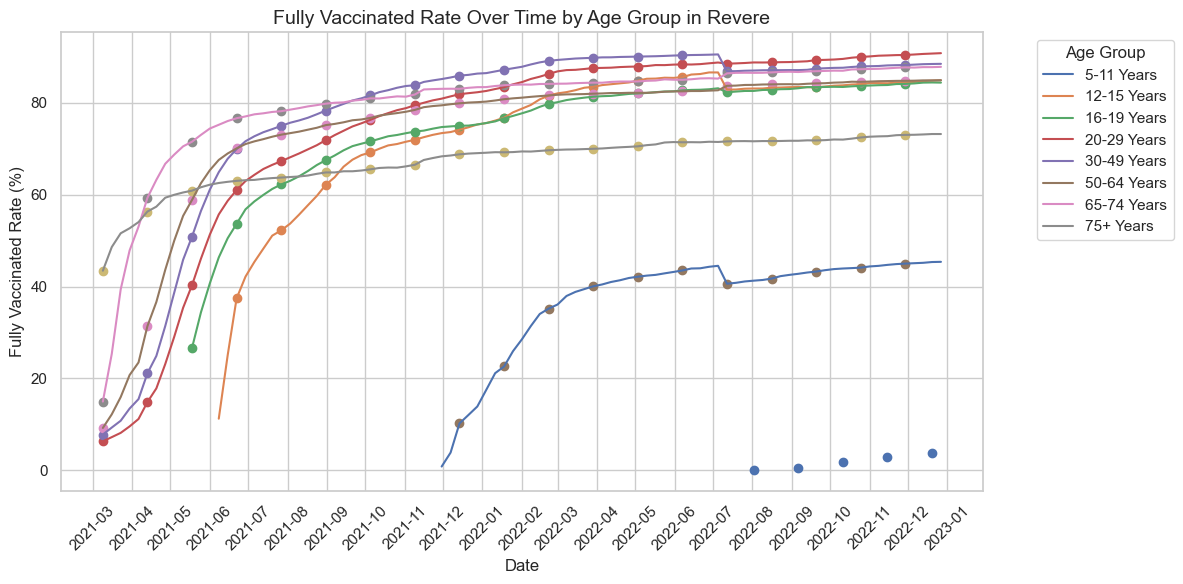

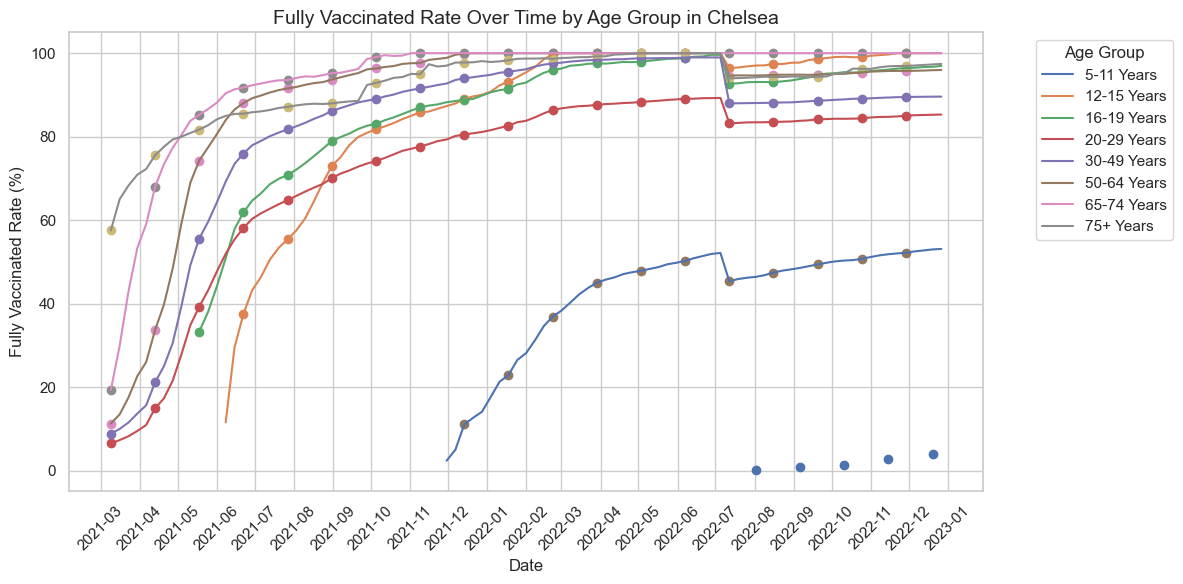

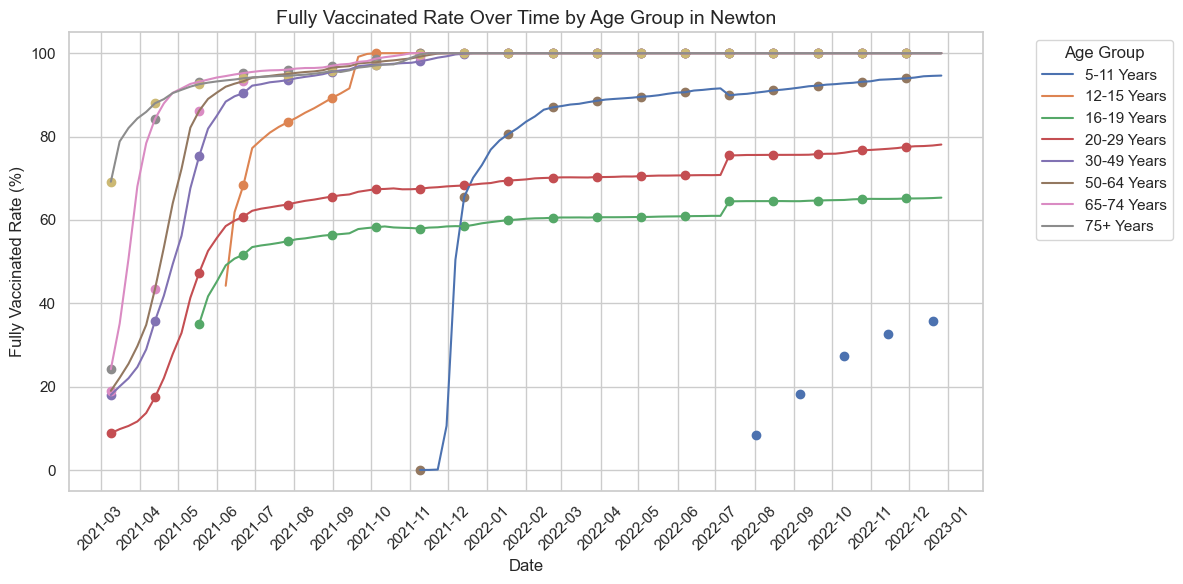

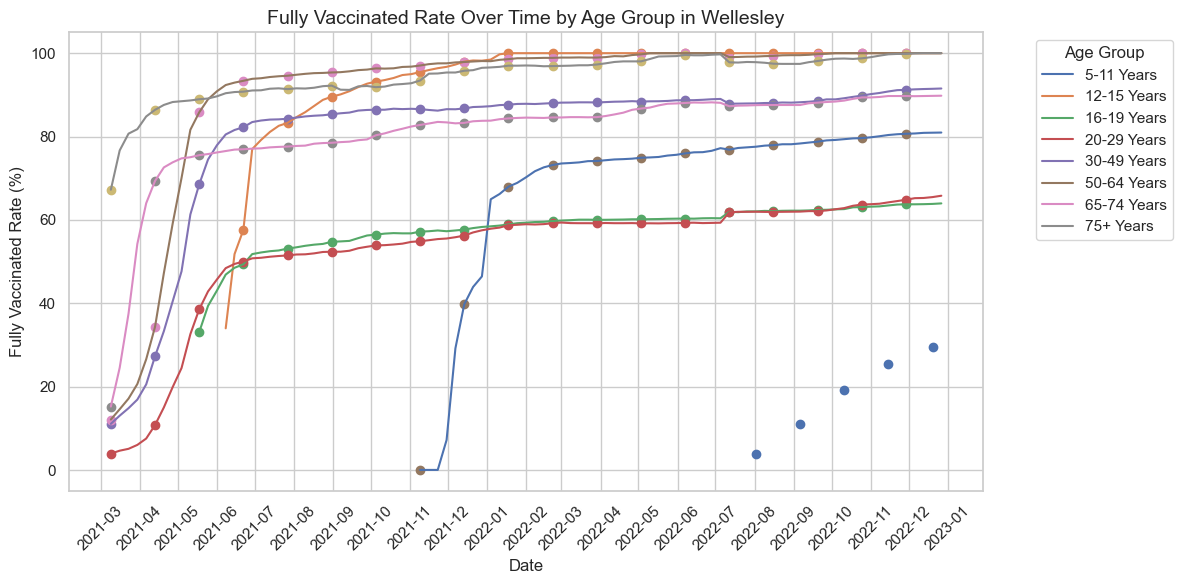

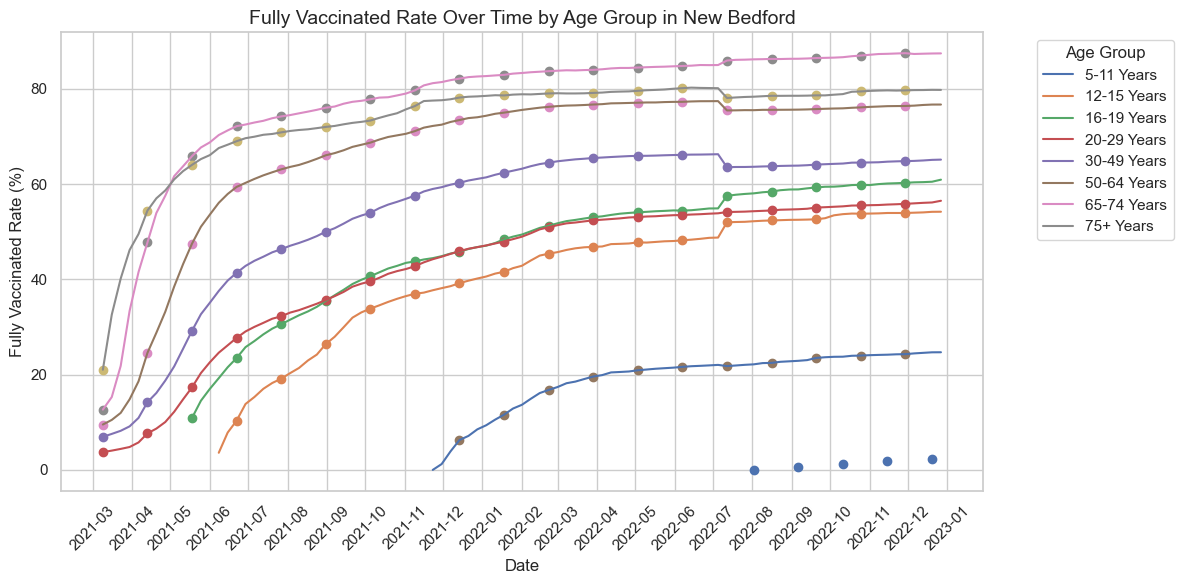

In [32]:
import matplotlib.dates as mdates
# Creating individual plots for each city
for city in cities_of_interest:
    plt.figure(figsize=(12, 6))
    city_data = df_city_for_chart_filtered_no_0_19[df_city_for_chart_filtered_no_0_19['city'] == city]

    sns.lineplot(data=city_data, x='date', y='fully_vaccinated_rate', hue='age_group', hue_order= hue_order)

    # Adding markers for every Nth data point
    for name, group in city_data.groupby('age_group'):
        plt.scatter(group.iloc[::N]['date'], group.iloc[::N]['fully_vaccinated_rate'], label=None)

    # Adding plot title and labels
    plt.title(f'Fully Vaccinated Rate Over Time by Age Group in {city}', fontsize=14)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Fully Vaccinated Rate (%)', fontsize=12)

    # Set x-axis to show each month
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

    plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [ ]:
# Constructing the linear regression model
formula = 'fully_vaccinated_rate ~ age_group + city'
model = smf.ols(formula, data=df_city_for_chart_filtered_no_0_19).fit()

print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     fully_vaccinated_rate   R-squared:                       0.552
Model:                               OLS   Adj. R-squared:                  0.550
Method:                    Least Squares   F-statistic:                     370.4
Date:                   Thu, 07 Dec 2023   Prob (F-statistic):               0.00
Time:                           02:14:30   Log-Likelihood:                -15520.
No. Observations:                   3624   AIC:                         3.107e+04
Df Residuals:                       3611   BIC:                         3.115e+04
Df Model:                             12                                         
Covariance Type:               nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

In [ ]:
import pandas as pd

df = pd.read_csv('/BU_grad/DS701_Tools/final_data.csv')


X = df.drop(['fully_vac_rate', 'year_month', 'city', 'Year','Month','Labor Force',
             'Employed','city_rate','Massachusetts Rate','boosted_rate_Multi',
             'boosted_rate_NH/PI','boosted_rate_Other/Unknown','fully_vac_rate_Multi',
             'fully_vac_rate_NH/PI','fully_vac_rate_Other/Unknown','onedose_vac_rate_Multi',
             'onedose_vac_rate_Other/Unknown','onedose_vac_rate_Total_y','boosted_rate_Total',
             'onedose_vac_rate_Total_x','onedose_vac_rate_Total'], axis=1)  # Features
y = df['fully_vac_rate']  # Target
print(f"X shape: {X.shape}, y shape: {y.shape}")

# Setting a threshold for missing values at 20%
missing_value_threshold_20 = 20.0  # 20%

# Identifying columns with missing values greater than the 20% threshold
columns_to_remove = df.isnull().mean() * 100 > missing_value_threshold_20
columns_to_remove = columns_to_remove[columns_to_remove].index.tolist()

# Removing these columns from the dataset
df_reduced = df.drop(columns=columns_to_remove)
df_reduced_dropped = df_reduced.drop(['year_month', 'city','Year','Month','Labor Force'], axis=1)


X shape: (130, 54), y shape: (130,)


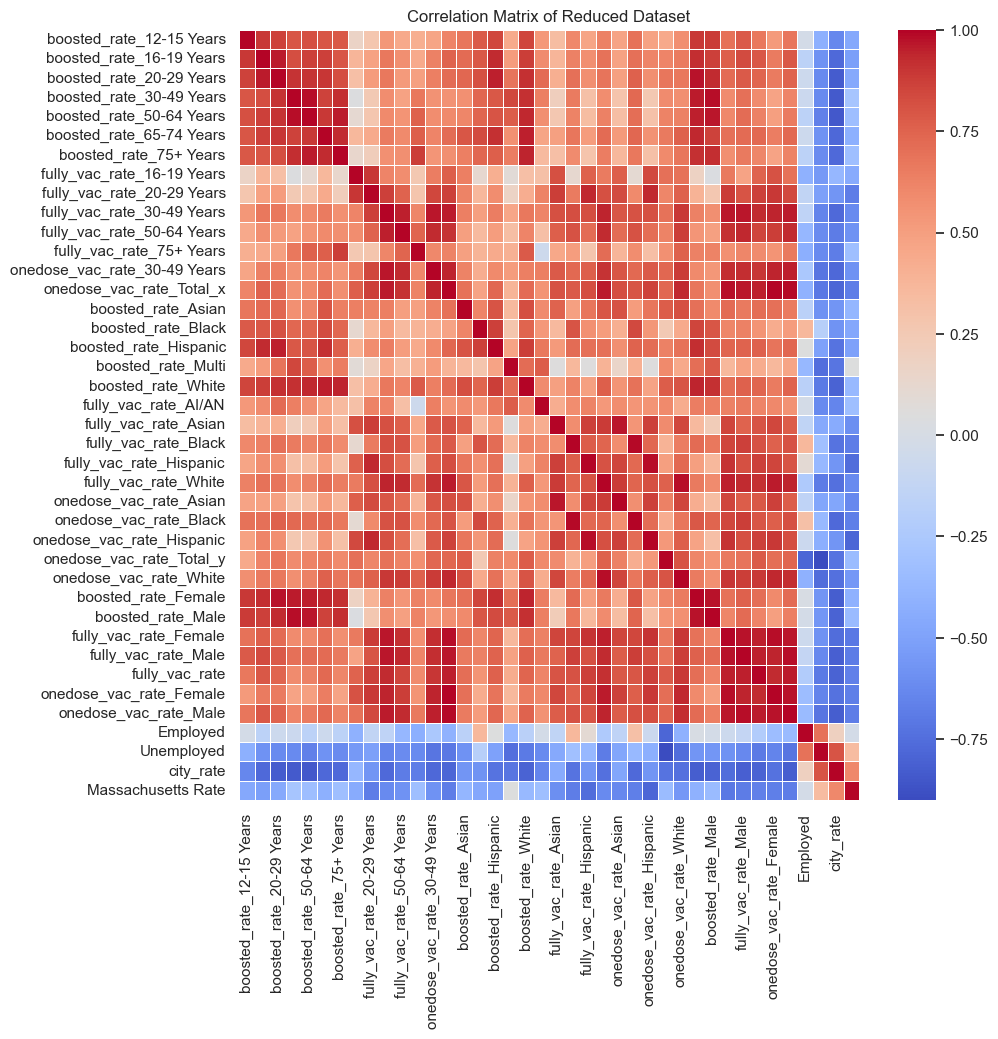

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a correlation matrix for the reduced dataset
reduced_correlation_matrix = df_reduced_dropped.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(reduced_correlation_matrix, annot=False, cmap='coolwarm', linewidths=.5)
plt.title("Correlation Matrix of Reduced Dataset")
plt.show()

In [ ]:
# Checking for missing values in the specified columns
target_column = 'fully_vac_rate_30-49 Years'
predictor_columns = [
    'onedose_vac_rate_0-19 Years', 'onedose_vac_rate_0-4 Years', 'onedose_vac_rate_12-15 Years', 
    'onedose_vac_rate_16-19 Years', 'onedose_vac_rate_20-29 Years', 'onedose_vac_rate_30-49 Years', 
    'onedose_vac_rate_5-11 Years', 'onedose_vac_rate_50-64 Years', 'onedose_vac_rate_65-74 Years', 
    'onedose_vac_rate_75+ Years', 'onedose_vac_rate_Total_x', 'boosted_rate_AI/AN', 
    'boosted_rate_Asian', 'boosted_rate_Black', 'boosted_rate_Hispanic', 'boosted_rate_Multi', 
    'boosted_rate_NH/PI', 'boosted_rate_Other/Unknown', 'boosted_rate_White', 'fully_vac_rate_AI/AN', 
    'fully_vac_rate_Asian', 'fully_vac_rate_Black', 'fully_vac_rate_Hispanic', 'fully_vac_rate_Multi', 
    'fully_vac_rate_NH/PI', 'fully_vac_rate_Other/Unknown', 'fully_vac_rate_White', 
    'onedose_vac_rate_AI/AN', 'onedose_vac_rate_Asian', 'onedose_vac_rate_Black', 
    'onedose_vac_rate_Hispanic', 'onedose_vac_rate_Multi', 'onedose_vac_rate_Other/Unknown', 
    'onedose_vac_rate_Total_y', 'onedose_vac_rate_White', 'boosted_rate_Female', 'boosted_rate_Male', 
    'boosted_rate_Other', 'boosted_rate_Total', 'fully_vac_rate_Female', 'fully_vac_rate_Male', 
    'fully_vac_rate_Other', 'fully_vac_rate', 'onedose_vac_rate_Female', 'onedose_vac_rate_Male', 
    'onedose_vac_rate_Other', 'onedose_vac_rate_Total', 'Labor Force', 'Employed', 'Unemployed', 
     'Massachusetts Rate'
]

missing_values = data[[target_column] + predictor_columns].isnull().sum()
missing_values_percentage = (missing_values / len(data)) * 100
missing_values_percentage.sort_values(ascending=False)



NameError: name 'data' is not defined

In [ ]:
# Setting a threshold for missing values
missing_value_threshold = 30.0  # 30%

# Selecting columns with missing values less than the threshold
columns_to_keep = missing_values_percentage[missing_values_percentage < missing_value_threshold].index.tolist()

# Filtering the dataset to include only the selected columns
filtered_data = data[columns_to_keep]

# Display the columns kept for the regression analysis
filtered_columns = filtered_data.columns
filtered_columns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Separating the target variable and predictor variables
X = filtered_data.drop(target_column, axis=1)
y = filtered_data[target_column]

# Imputing missing values in X with the mean of each column
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=0)

# Creating and training the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Calculating performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(4.894175973890512, 0.9886775576023943)

In [ ]:
# Extracting the coefficients of the model
coefficients = model.coef_

# Creating a DataFrame to display predictor variables and their corresponding coefficients
coefficients_df = pd.DataFrame({
    'Predictor': X.columns,
    'Coefficient': coefficients
})

# Sorting the coefficients to see which have the most influence
coefficients_df.sort_values(by='Coefficient', key=abs, ascending=True)

,Predictor,Coefficient
29,Labor Force,-0.000178
30,Employed,0.000178
31,Unemployed,-0.000356
8,boosted_rate_Multi,-0.004066
6,boosted_rate_Black,-0.005997
28,onedose_vac_rate_Total,-0.011828
5,boosted_rate_Asian,-0.013141
11,fully_vac_rate_Asian,0.013273
1,onedose_vac_rate_20-29 Years,-0.021269
3,onedose_vac_rate_Total_x,-0.022708


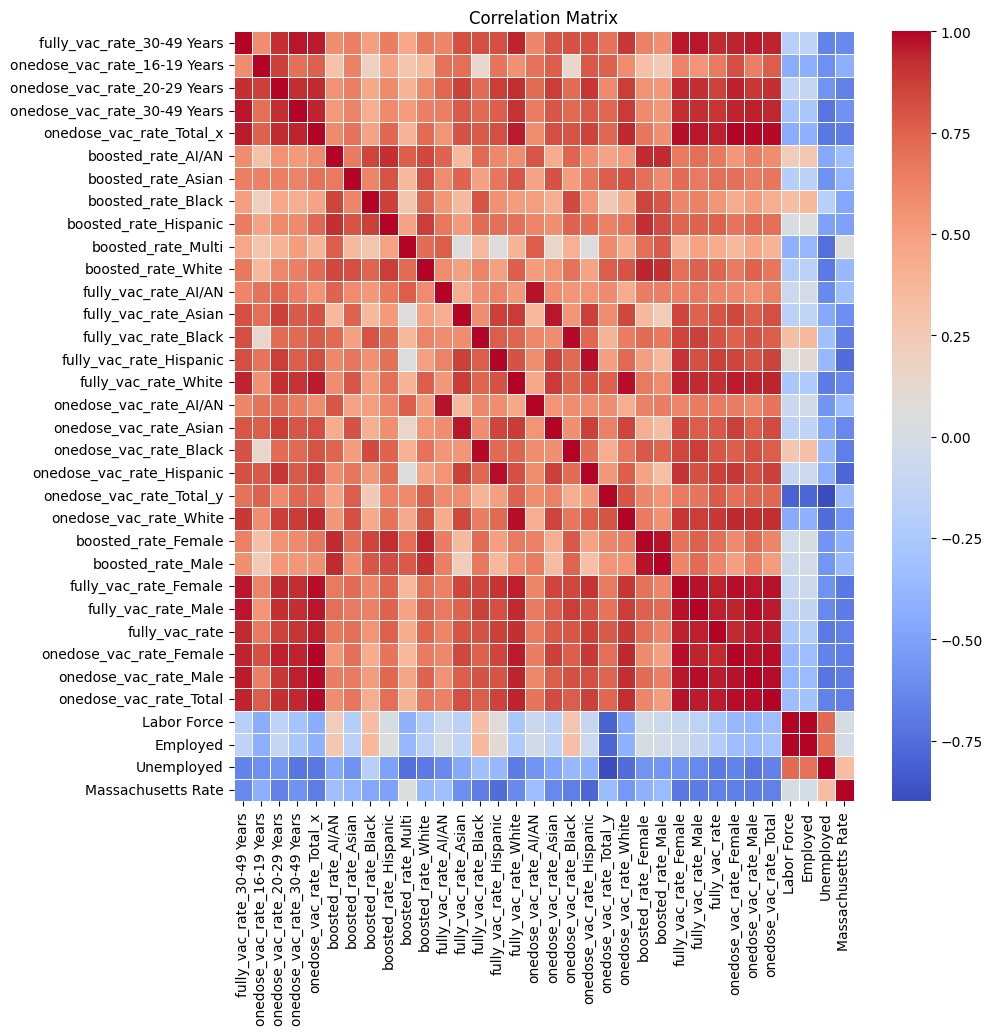

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a correlation matrix
correlation_matrix = filtered_data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=.5)
plt.title("Correlation Matrix")
plt.show()